<img src="https://upload.wikimedia.org/wikipedia/commons/7/79/LOGO-COMPUESTO-UNAM-ENES_-_copia.png">
<h2><center>Tecnologías para Información en Ciencias</center></h2>
<h2><center>Introducción a la Ciencia de Datos</center></h2>
<h2><center> Web Scraping con Beautiful Soup </center></h2>
<h2><center>Luis David Huante García</center></h2>
<h2><center>Matrícula: 420138905</center></h2>
<h2><center>A 5 de junio de 2022</center></h2>



### Introducción

Hoy en día, con el flujo tan masivo de datos que existe en el mundo, han surgido diversos usos y métodos que permiten su utilización. De acuerdo con un informe proveniente de la revista Data Never Sleeps, se generan alrededor de 2,5 billones de bytes de datos cada día en internet. Estos datos se distribuyen de distintas maneras a lo largo de toda la web, y pertenecen a distintos temas. 

Los datos pueden ser provenientes de sensores climáticos, de satélites, de análisis de negocios, de puntos de venta, de métricas de sitios web, por mencionar algunos cuantos. La globalización y diversos fenómenos económicos, sociales y el mismo avance de la tecnología ha contribuido a este fenómeno de digitalización masiva, donde muchos eventos son registrados y almacenados en datos todos los días, a toda hora.

Gracias a la aparición masiva de datos, ha surgido diversas disciplinas que se encargan de recopilar, analizar, limpiar y usar de distintas maneras los mismos, de ahí la aparición de la Ciencia de Datos. Los llamados científicos de datos se encargan de realizar estas labores. 

En los sitios web, se almacenan datos dependiendo de la índole de los mismos, y a través de un proceso llamado Web Scraping (Raspado de Web), es posible extraer contenido y datos. Se extrae el código HTML, y con él, los datos almacenados en el sitio. Tiene usos muy útiles, como la recopilación de bases de datos. Dependiendo del sitio, podemos extraer datos de distinto tipo y usarlos para crear algo útil y/o creativo.

Sin embargo, es un proceso que debe ser realizado con cautela, ya que no todos los sitios web dan su información con tanta facilidad, los servidores pueden detectar usos ilícitos y limitar su uso. Es por eso que el Web Scraping es un proceso muy delicado, pero también muy importante.



Usaremos la herramienta de “Beautiful Soup”, para procesar el código fuente de una página y acceder a sus datos. Se procesará la página, y en especial la información sobre la existencia (stock) de libros y obtener detalles de los ejemplares, como título, calificación, entre otras. Se usará también el proceso de Data Wrangling y la librería Pandas ya vista en clase.


#### Ejercicio 6: Imprime el código fuente HTML con indentaciones para que puedas encontrar las etiquetas y atributos de los objetos que buscas:

In [147]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns

HTML = urlopen('http://books.toscrape.com/catalogue/page-1.html')
bs = BeautifulSoup(HTML, 'html.parser')
print(bs.prettify(formatter='html'))

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

#### Ejercicio 7: Empleando BeautifulSoup en Python obten los títulos de los libros en la página actual.

In [148]:
titles = bs.find_all('h3')

In [149]:
all_titles=[nombre.a.attrs["title"] for nombre in titles]
all_titles

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

#### Ejercicio 8: Usando BeautifulSoup en Python obtén los precios de los libros en la página actual.

In [150]:
prices =[precio.get_text() for precio in bs.find_all("p",class_="price_color")]

In [151]:
prices

['£51.77',
 '£53.74',
 '£50.10',
 '£47.82',
 '£54.23',
 '£22.65',
 '£33.34',
 '£17.93',
 '£22.60',
 '£52.15',
 '£13.99',
 '£20.66',
 '£17.46',
 '£52.29',
 '£35.02',
 '£57.25',
 '£23.88',
 '£37.59',
 '£51.33',
 '£45.17']

#### Ejercicio 9: Obtén las valoraciones de los libros en la página actual. En este punto considera el uso de la función tag.attrs.items() 

In [152]:
ratings = bs.find_all("p",class_="star-rating")
all_ratings = [list(rating.attrs.values())[0][1] for rating in ratings]

In [153]:
all_ratings

['Three',
 'One',
 'One',
 'Four',
 'Five',
 'One',
 'Four',
 'Three',
 'Four',
 'One',
 'Two',
 'Four',
 'Five',
 'Five',
 'Five',
 'Three',
 'One',
 'One',
 'Two',
 'Two']

Surgió una compplicación al recolectar los datos de las calificaciones ya que no está en el formato de los libros, pero se pudo obtenerlos examinando un objeto de párrafo, con el nombre de star-rating, y tan solo es cuestión de analizarlo directamente para que arroje lo  que se necesita.

#### Ejercicio 10: Obtén los URLs de las imágenes. No olvides que el atributo src de las imágenes es relativo (inicia con ../ ), por lo que hay que substituir los dos puntos por el URL base de la página (que inicia con http:// ).

In [154]:
urls=bs.find_all("img")
all_images = ['http://books.toscrape.com'+img.attrs["src"][2:] for img in Urls]
all_images

['http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'http://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'http://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'http://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'http://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'http://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'http://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'http://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'http://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'http://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'http://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'http://books.toscrape.com/media/cache/10/48/1048f63d3b5061cd2f4

#### Ejercicio 11: Verifica que tengas la misma cantidad de títulos, precios, valoraciones y URLs.

In [155]:
len(all_titles)

20

In [156]:
len(all_ratings)

20

In [157]:
len(prices)

20

In [158]:
len(all_images)

20

En cada página hay 20 libros, entonces los datos recopilados son correctos en cantidad

#### Ejercicio 12: Repite el proceso para cada página que vas a procesar. NO substituyas la información de la página anterior, la debes ir acumulando.

In [159]:
for i in range(2,51):
    html = urlopen('http://books.toscrape.com/catalogue/page-'+str(i)+'.html')
    bs = BeautifulSoup(html, 'html.parser')
    titles = bs.find_all("h3")
    all_titles +=[title.a.attrs["title"] for title in titles]
    prices=bs.find_all("p",class_="price_color")
    prices += [price.get_text() for price in prices]
    images = bs.find_all("img")
    all_images += ['http://books.toscrape.com'+img.attrs["src"][2:] for img in images]
    ratings = bs.find_all("p",class_="star-rating")
    all_ratings += [list(rate.attrs.values())[0][1] for rate in ratings]

En este caso, cada página del sitio tiene un patrón diferente con un archivo html a renderizar conteniendo el número de página.

In [160]:
len(all_titles),len(prices),len(all_ratings),len(all_images)

(1000, 40, 1000, 1000)

Comprobamos que tenemos los diferentes datos de las otras 50 páginas.

#### Ejercicio 13: Crea un Dataframe de Pandas con TODA la información recolectada (las columnas deben ser: Título , Precio , Valoraciones y URLs ).

In [161]:
import pandas as pd

In [162]:
TablaLibros = pd.DataFrame()
TablaLibros["Título"]=AllNames
TablaLibros["Precio"]=Precios
TablaLibros["Calificaciones"]=Calificacion
TablaLibros["URL de imagenes"]=Imagenes

In [163]:
TablaLibros

,Título,Precio,Calificaciones,URL de imagenes
0,A Light in the Attic,£51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,£53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,£50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,£47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History of Humankind,£54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
5,The Requiem Red,£22.65,One,http://books.toscrape.com/media/cache/68/33/68...
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four,http://books.toscrape.com/media/cache/92/27/92...
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three,http://books.toscrape.com/media/cache/3d/54/3d...
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four,http://books.toscrape.com/media/cache/66/88/66...
9,The Black Maria,£52.15,One,http://books.toscrape.com/media/cache/58/46/58...


#### Ejercicio 14: Elimina los símbolos de la moneda en la que están los precios (deja sólo números con punto decimal).

In [164]:
TablaLibros["Precio"] = TablaLibros["Precio"].str.replace('£','')
TablaLibros

,Título,Precio,Calificaciones,URL de imagenes
0,A Light in the Attic,51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History of Humankind,54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
5,The Requiem Red,22.65,One,http://books.toscrape.com/media/cache/68/33/68...
6,The Dirty Little Secrets of Getting Your Dream...,33.34,Four,http://books.toscrape.com/media/cache/92/27/92...
7,The Coming Woman: A Novel Based on the Life of...,17.93,Three,http://books.toscrape.com/media/cache/3d/54/3d...
8,The Boys in the Boat: Nine Americans and Their...,22.60,Four,http://books.toscrape.com/media/cache/66/88/66...
9,The Black Maria,52.15,One,http://books.toscrape.com/media/cache/58/46/58...


Se usa la función `replace()`, quitando el símbolo de libras y poniendo un espacio vacío.

#### Ejercicio 15: Ordena el dataframe inplace de acuerdo a la columna Precio en orden descendente.

In [165]:
TablaLibros.sort_values(by=["Precio"],ascending=False,inplace=True)
TablaLibros

,Título,Precio,Calificaciones,URL de imagenes
15,Our Band Could Be Your Life: Scenes from the A...,57.25,Three,http://books.toscrape.com/media/cache/54/60/54...
4,Sapiens: A Brief History of Humankind,54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
13,Scott Pilgrim's Precious Little Life (Scott Pi...,52.29,Five,http://books.toscrape.com/media/cache/94/b1/94...
9,The Black Maria,52.15,One,http://books.toscrape.com/media/cache/58/46/58...
0,A Light in the Attic,51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
18,Libertarianism for Beginners,51.33,Two,http://books.toscrape.com/media/cache/0b/bc/0b...
2,Soumission,50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
19,It's Only the Himalayas,45.17,Two,http://books.toscrape.com/media/cache/27/a5/27...


Usamos la función `sort_values()` y se especificamos la columna por la que se ordenará. En este caso queremos que sea descendente el orden, por lo que el se define al argumento `ascending=False`.

#### Ejercicio 16: Si las valoraciones las tienes como cadena de texto cámbialas a valores numéricos equivalentes.

In [166]:
TablaLibros["Calificaciones"]=TablaLibros["Calificaciones"].replace({"One":1,"Two":2,"Three":3,"Four":4,"Five":5})
TablaLibros

,Título,Precio,Calificaciones,URL de imagenes
15,Our Band Could Be Your Life: Scenes from the A...,57.25,3,http://books.toscrape.com/media/cache/54/60/54...
4,Sapiens: A Brief History of Humankind,54.23,5,http://books.toscrape.com/media/cache/be/a5/be...
1,Tipping the Velvet,53.74,1,http://books.toscrape.com/media/cache/26/0c/26...
13,Scott Pilgrim's Precious Little Life (Scott Pi...,52.29,5,http://books.toscrape.com/media/cache/94/b1/94...
9,The Black Maria,52.15,1,http://books.toscrape.com/media/cache/58/46/58...
0,A Light in the Attic,51.77,3,http://books.toscrape.com/media/cache/2c/da/2c...
18,Libertarianism for Beginners,51.33,2,http://books.toscrape.com/media/cache/0b/bc/0b...
2,Soumission,50.10,1,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,47.82,4,http://books.toscrape.com/media/cache/32/51/32...
19,It's Only the Himalayas,45.17,2,http://books.toscrape.com/media/cache/27/a5/27...


#### Ejercicio 17: Verifica los tipos de datos de cada columna.

In [167]:
TablaLibros.dtypes

Título             object
Precio             object
Calificaciones      int64
URL de imagenes    object
dtype: object

#### Ejercicio 18: Convierte al tipo correcto la(s) columna(s) que no lo tengan.

In [168]:
TablaLibros["Calificaciones"] = pd.to_numeric(TablaLibros["Calificaciones"], downcast="float")

#### Ejercicios 19 y 20: ¿Existe correlación entre los precios y las valoraciones de los libros? Muéstralo de forma gráfica (tú eliges la gráfica que mejor lo represente, en tu opinión).

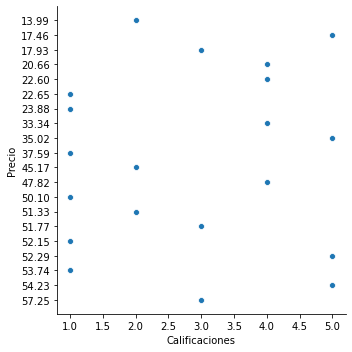

In [169]:
sns.relplot(x="Calificaciones",y="Precio",data=TablaLibros)

Podemos usar una gráfica de dispersión, en la que se ven los libros comparados entre su calificación y precio. Se ve que hay todo tipo de valoraciones. Hay libros muy caros y con baja calificación, y libros muy buenos y muy baratos, por lo que parece no haber correlación alguna.

## Conclusión

Como todo proyecto de Ciencia de Datos, no podemos omitir pasos tan importantes como el Data Wrangling y Data Cleaning, ya que esto nos permite manipular los datos correctamente una vez que tienen la forma que nosotros buscamos. En este caso se realizó un proceso llamado Web Scraping, proceso fundamental en la vida profesional de un científico de datos. El obtener información a través de este proceso no resulta para nada trivial, ya que existen diversos obstáculos que pueden interponerse en el "raspado de datos". Estos obstáculos van desde un sitio web mal hecho, hasta un bloqueo de la I.P. desde donde se realiza el trabajo.

Es fundamental, así como interesante seguir experimentando con el Web Scraping ya que nos permite obtener grandes cantidades de información proveniente de sitios web en muy poco tiempo. En este caso pudimos obtener conclusiones interesantes acerca de los datos recolectados, como una correlación inexistente entre el precio de los libros y su valoración. Es así como el proceso de Web Scraping es una herramiental muy efectiva y útil a la hora de poder obtener conjuntos de datos a partir de los cuales podemos emitir deducciones. En particular, este proyecto me resultó muy interesante por todas las posibilidades que tiene el Web Scraping.